## EE 242 Lab 2 – Convolution

Author names go here 
Jizhe Lian, Ethan Jiang, Jasper Chen
(This should be a markup cell, which means that when you run it you just get formated text.)

In [5]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# from scipy.io import wavfile as wav
import simpleaudio as sa
from scipy import signal as sig
from scipy import ndimage
from skimage import color
from skimage import io
from PIL import Image
from scipy.io import wavfile as wav
# import whatever other modules you use in this lab -- there are more that you need than we've included 

## Summary

In this lab, you will work through a series of exercises involving convolution of time signals and images.  This is a two-week lab.  You should plan on completing the first 3 assignments in the first week.

## Lab 2 turn in checklist

•	Pre-lab (upload to canvas before lab)

•	Lab 1 Jupyter notebook with code for the first 4 exercises assignment in separate cells. Each assignment cell should contain markdown cells (same as lab overview cells) for the responses to lab report questions. Include your lab members’ names at the top of the notebook.

•	1 individual Jupyter notebook with code + markdown cells for the last exercise

Note: The pre-lab should be done individually, and all other assignments should be completed in groups of 3-4 people.


## Assignment 1 -- Simple Convolutions

13
[0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
[1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[0. 0. 1. 2. 3. 4. 4. 4. 4. 3. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.] 25
[ 0.  0.  1.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.] 25


<IPython.core.display.Javascript object>


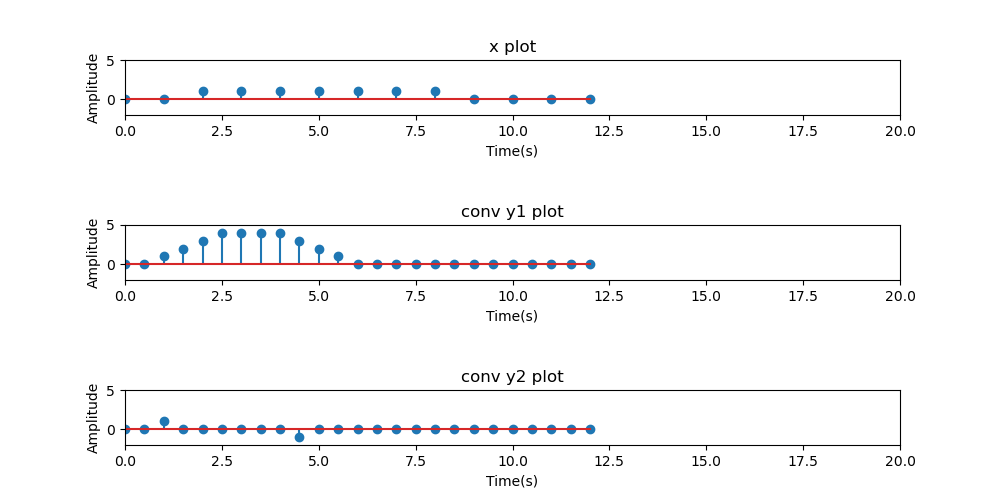

In [6]:
# Assignment 1 - Time Scaling Function

# Part A

# Create three discrete-time signals, assuming a time range of [0,12]
# x: input signal vector, a box of height 1 starting at time n=2 and ending at n=8
# h1: a pulse of length 4 & height 1 starting at time 0
# h2 = 1 at n=0, -1 at n=1, and 0 otherwise
# TODO: Code that solves B
x = np.zeros(13)

print(len(x))
x[2:9] = np.ones(7)
print(x)

h1 = np.concatenate((np.ones(4), np.zeros(9)))
print(h1)

h2 = np.zeros(13)
h2[0] = 1
h2[1] = -1
print(h2)

# Part B
# Find the responses y1=x*h1 and y2=x*h2
# TODO: Code that solves B
y1 = np.convolve(x, h1)
y2 = np.convolve(x, h2)
print(y1, len(y1))
print(y2, len(y2))



# Part C
# Plot x, y1 and y2 in a 3x1 plot
# TODO: Code that solves C

nx  = np.linspace(0, 12, 13)
ny1 = np.linspace(0, 12, 25)
ny2 = np.linspace(0, 12, 25)

fig = plt.figure(1, figsize=(10,5))
# plot parameter set 1
plt.subplot(311) 
plt.stem(nx, x)
plt.title('x plot')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.xlim(0,20)
plt.ylim(-2,5)

# plot parameter set 2
plt.subplot(312) 
plt.stem(ny1, y1)
plt.title('conv y1 plot')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.xlim(0,20)
plt.ylim(-2,5)

# plot parameter set 3
plt.subplot(313) 
plt.stem(ny2, y2)
plt.title('conv y2 plot')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.xlim(0,20)
plt.ylim(-2,5)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=2)
plt.show()

###  Discussion

Comment on what aspects of the input signal correspond to the largest values of y1[n] and y2[n] 

In y1, from 2.5 to 4, the overlap between x and h1 reachs the maxium, therefore y also reachs the maximum.

in y2, y2 reaches the max at n=1 because at this point h2 and x start to overlap, but from n=1.5 to 4, the overlap cancel out with each other, and then at n=4.5 reaches the minium.  


## Assignment 2 -- Smoothing Signals

time: [0.000e+00 1.000e-03 2.000e-03 ... 1.997e+00 1.998e+00 1.999e+00]
n 2000
[ 7.7410951   7.79434764  7.84760017 ... 16.5314303  16.5314303
 16.5314303 ]
2000


<IPython.core.display.Javascript object>


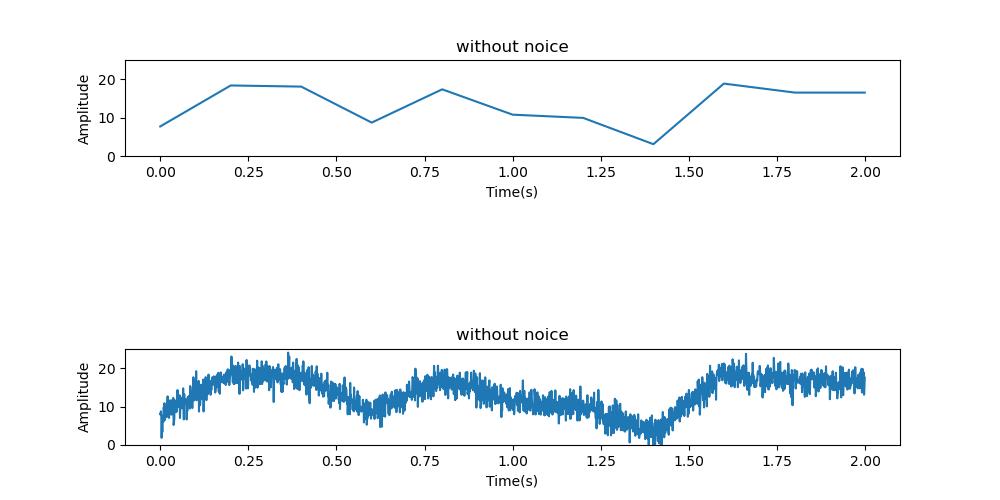

In [7]:
# Assignment 2 - Amplitude Operations on Signals

# Part A
# set up relevant parameters
srate = 1000 # sampling rate in Hz
time  = np.arange(0,2,1/srate) # associated time vector that corresponds to 2 seconds
print("time:",time)
n     = len(time) # length of the time vector
print("n", n)

# here is a base signal to work with, values of signal points chosen randomly
p   = 10 # points for piecewise linear signal
amp = 20   # amplitude range of base signal
base = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*amp)
print(base)
print(len(base))
# create some random noise to be added to the abve base signals
noiseamp = 2
noise  = noiseamp * np.random.randn(n)

# add noise to the base signals to create new noisy signals
# TODO: Code that solves the rest of A
base_ns = np.add(noise, base)

fig = plt.figure(2, figsize=(10,5))
# plot parameter set 1
plt.subplot(211) 
plt.plot(time, base)
plt.title('without noice')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.ylim(0,25)

# plot parameter set 2
plt.subplot(212) 
plt.plot(time, base_ns)
plt.title('without noice')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.ylim(0,25)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=2)
plt.show()





<IPython.core.display.Javascript object>


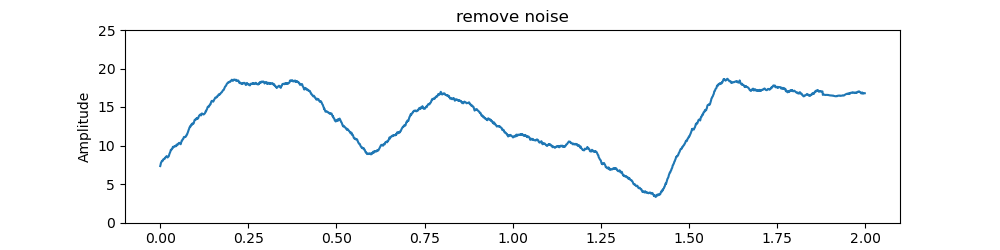

In [8]:
# Part B
# implement the running mean filter with a for loop
# TODO: Code that solves B
filtsig1 = np.zeros(2000)
for i in range(20):
    filtsig1[i] = np.mean(np.concatenate((base_ns[0:i],base_ns[i:i+20])))
for i in range (20,1880):
    filtsig1[i] = np.mean(np.concatenate((base_ns[(i-20):i],base_ns[i:i+20])))
for i in range (1880,2000):
    filtsig1[i] = np.mean(np.concatenate((base_ns[(i-20):i],base_ns[i:i+(2000-i)])))

fig = plt.figure(3, figsize=(10,2.5))
# plot parameter set 1
plt.subplot(111) 
plt.plot(time, filtsig1)
plt.title('remove noise')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.ylim(0,25)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=2)
plt.show()

[0.19846113 0.38885688 0.60213457 ... 1.10563763 0.7871026  0.42658794] 2040


<IPython.core.display.Javascript object>


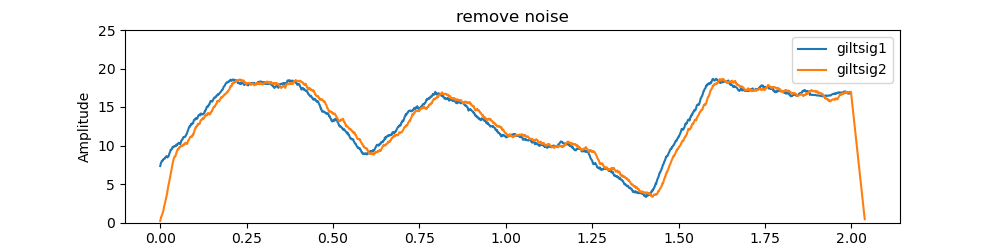

In [9]:
# Part C
# implement smoothing using convolution
# TODO: Code that solves C
hfilt = np.ones(2*20+1) # k=20 length N
hfilt = hfilt * (1/41) #1/N

filtsig2 = np.convolve(base_ns, hfilt)
print(filtsig2, len(filtsig2))
time2  = np.arange(0,2.04,1/srate)

fig = plt.figure(4, figsize=(10,2.5))
# plot 
plt.subplot(111) 
plt.plot(time, filtsig1, label = 'giltsig1')
plt.plot(time2, filtsig2, label = 'giltsig2')
#plt.plot(time, filtsig2[40:])
plt.title('remove noise')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.legend()
plt.ylim(0,25)
plt.show()


###  Discussion

Describe the differences in the results using the two methods and explain these differences in terms of system properties. Comment on how the results and plots change when you amplify the noise more and also change the value of k. 

The giltsig1 stay take the average at the original laocation, howoever, giltsig2 seems shift to the right a little. Moreover, there is sa sudden increase at the beginning for giltsig2. 

giltsig2 has a increase in the begin because the overlapping areas of the two function is 0 at t = 0, and increase linearly until the full overlap.

Giltsig2 is shift to right because at N = 0.04, two function is fully overlap, but the value of the convolution is the average of 0.2, which is the middle point of the overlaping area. 

## Assignment 3 -- Removing Noise from an Audio Signal 

In [11]:
# Assignment 3 -- Title of assignment 3

# Part A
# TODO: Code that solves A
frq_tr_orig, tr_orig = wav.read('trombone11.wav')
noiseamp = 100

tr_noise  = noiseamp * np.random.randn(len(tr_orig))
tr_noisy = np.add(tr_noise, tr_orig)
print(tr_noise)
print(tr_orig)
print(tr_noisy)
wav.write('tr_noisy.wav', frq_tr_orig, tr_noisy.astype('int16'))

# Part B
# TODO: Code that solves B
hfilt = np.ones(2*20+1) # k=20 length N
hfilt = hfilt * (1/41) #1/N

tr_filt = np.convolve(tr_noisy, hfilt)
wav.write('tr_filt.wav', frq_tr_orig, tr_filt.astype('int16'))

# Part C
# TODO: Code that solves C
wav_obj_noisy =  sa.WaveObject.from_wave_file('tr_noisy.wav')
wav_obj_filt = sa.WaveObject.from_wave_file('tr_filt.wav')
wav_obj_orig = sa.WaveObject.from_wave_file('trombone11.wav')

wav_obj_noisy.play().wait_done()
wav_obj_filt.play().wait_done()
wav_obj_orig.play()

FileNotFoundError: [Errno 2] No such file or directory: 'trombone11.wav'

###  Discussion

Comment on the differences in how the original and noise-removed signals sound. Comment on the impact of large increases or decreases in the value of k. 

As k increases, the amplitude of the signal decreases, as we're taking the average of a longer range, and vice-versa. Due to this, the noise-removed signal has a lower volume than the original signal. 

## Assignment 4 -- Convolution with Images

In [12]:
# Part A
# TODO: Code that solves A

def SED(image):
    h1=  [[1,0,-1],[2,0,-2],[1,0,-1]]
    h2 = [[1,2,1],[0,0,0],[-1,-2,-1]]
    verti = ndimage.filters.convolve(image, h2)
    horiz = ndimage.filters.convolve(image, h1)
    ynm = np.sqrt(np.power(verti, 2)+np.power(horiz,2))
    return verti, horiz, ynm





<IPython.core.display.Javascript object>


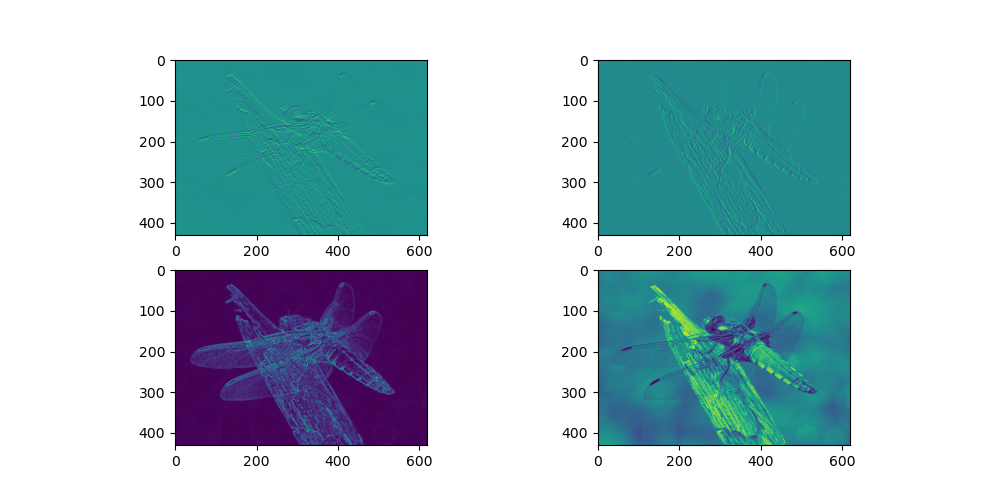

In [13]:
# Part B
# TODO: Code that solves B
image = color.rgb2gray(plt.imread('dragonfly.jpg'))
pic1, pic2, pic3 = SED(image)
fig = plt.figure(5, figsize=(10,5))

plt.subplot(221) 
plt.imshow(pic1)

plt.subplot(222) 
plt.imshow(pic2)

plt.subplot(223) 
plt.imshow(pic3)

plt.subplot(224) 
plt.imshow(image)

#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=2)
plt.show()





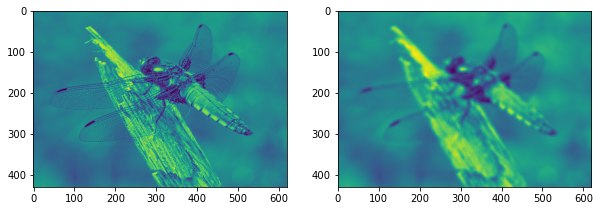

In [43]:
# Part C
# TODO: Code that solves C
kel = np.ones((10,10))*0.01

modif_pic = ndimage.filters.convolve(image, kel)

fig = plt.figure(6, figsize=(10,5))

plt.subplot(121) 
plt.imshow(image)

plt.subplot(122) 
plt.imshow(modif_pic)


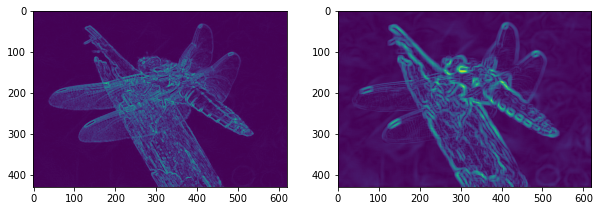

In [44]:
# Part D
# TODO: Code that solves D
pic4, pic5, pic6 = SED(modif_pic)
fig = plt.figure(6, figsize=(10,5))

plt.subplot(121) 
plt.imshow(pic3)

plt.subplot(122) 
plt.imshow(pic6)

plt.show()

### Discussion

Describe the differences in the results using the edge detector or the original and smoothed image. Comment on how the results change if you use a larger size smoothing filter.

By using the edge detector, the function uses the derviative technique to display the rate of change at the each position of the pixiel, which can show the boundary. In the original picture, the boundary is obvious to observe. However, in the smoothed image, we averaged the pixiel with surrounding which makes the boundary blurry, and thus the rate of change is not that significant as before. 